# scIB

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import anndata
from scipy import io

import scanpy as sc
import scvi
import scib
import torch
from scib_metrics.benchmark import Benchmarker

/opt/conda/envs/sc-py/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/opt/conda/envs/sc-py/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/opt/conda/envs/sc-py/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/envs/sc-py/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/opt/conda/envs/sc-py/lib/python3.10/site-packages/scib_metrics/_types.py:9

In [3]:
adata= sc.read('./scANVI_model/scANVI.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 95097 × 5000
    obs: 'nCount_RNA', 'nFeature_RNA', 'Strain', 'Sex', 'Tissue', 'Technology', 'Author', 'CellType', 'Study', 'Batch', 'DevTP', '_scvi_batch', '_scvi_labels'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Author_colors', 'Batch_colors', 'CellType_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p', 'pca'
    obsm: 'X_mde', 'X_mde_scanvi', 'X_pca', 'X_scANVI', 'X_scVI'
    varm: 'PCs'

In [6]:
bm = Benchmarker(
    adata,
    batch_key="Batch",
    label_key="CellType",
    embedding_obsm_keys=["X_mde", "X_mde_scanvi"],
    n_jobs=-1,
)
bm.benchmark()

Metrics:  60%|████████████████████████▌                | 6/10 [01:36<00:46, 11.55s/it, Batch correction: kbet_per_label]

INFO     BMSCs consists of a single batch or is too small. Skip.                                                   
INFO     Fibroblasts consists of a single batch or is too small. Skip.                                             
INFO     LepR+ BMSCs consists of a single batch or is too small. Skip.                                             
INFO     Myogenic stem cells consists of a single batch or is too small. Skip.                                     
INFO     Osteoclasts consists of a single batch or is too small. Skip.                                             
INFO     Periosteal stem cells consists of a single batch or is too small. Skip.                                   
INFO     Platelets consists of a single batch or is too small. Skip.                                               
INFO     SSPCs consists of a single batch or is too small. Skip.                                                   



Metrics:   0%|                                                                                   | 0/10 [00:00<?, ?it/s]
                                                                                                                        
Metrics:  60%|████████████████████████▌                | 6/10 [01:09<00:25,  6.47s/it, Batch correction: kbet_per_label]

INFO     BMSCs consists of a single batch or is too small. Skip.                                                   
INFO     Fibroblasts consists of a single batch or is too small. Skip.                                             
INFO     LepR+ BMSCs consists of a single batch or is too small. Skip.                                             
INFO     Myogenic stem cells consists of a single batch or is too small. Skip.                                     
INFO     Osteoclasts consists of a single batch or is too small. Skip.                                             
INFO     Periosteal stem cells consists of a single batch or is too small. Skip.                                   
INFO     Platelets consists of a single batch or is too small. Skip.                                               
INFO     SSPCs consists of a single batch or is too small. Skip.                                                   



Embeddings: 100%|████████████████████████████████████████████████████████████████████████| 2/2 [05:10<00:00, 155.26s/it]

                                                                                                                        

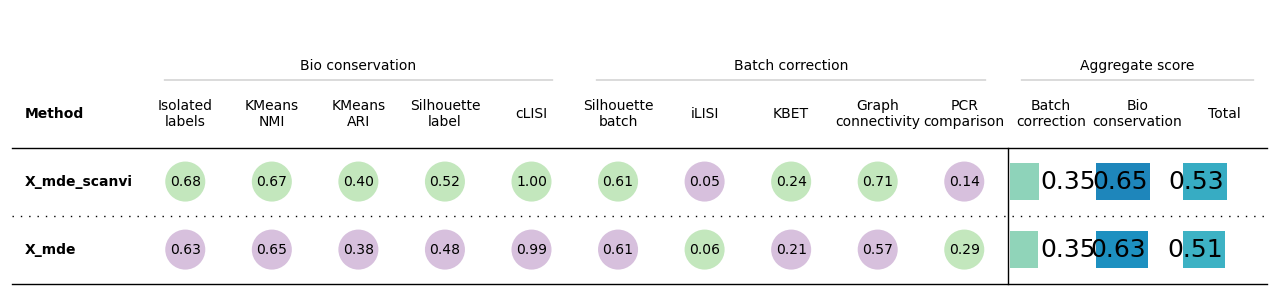

In [7]:
bm.plot_results_table(min_max_scale= False, save_dir='scANVI_model/')